In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
# load the jsonl files
train_df = pd.read_json('data/raw/hateful_memes/train.jsonl', lines=True)
dev_seen_df = pd.read_json('data/raw/hateful_memes/dev_seen.jsonl', lines=True)
dev_unseen_df = pd.read_json('data/raw/hateful_memes/dev_unseen.jsonl', lines=True)
test_seen_df = pd.read_json('data/raw/hateful_memes/test_seen.jsonl', lines=True)
test_unseen_df = pd.read_json('data/raw/hateful_memes/test_unseen.jsonl', lines=True)

In [3]:
# dict to help inspect each df
df_dict = {'train': train_df,
           'dev_seen': dev_seen_df,
           'dev_unseen': dev_unseen_df,
           'test_seen': test_seen_df,
           'test_unseen':test_unseen_df
          }

# inspect each df
ids = []
for name, df in df_dict.items():
    print(name.upper())
    df.info()
    print(f"\nThe target distribution for {name} is: \n{df['label'].value_counts()}")
    print('\n')
    
    # check each id is unique for a given df
    assert(df['id'].nunique()==len(df['id']))
    ids.extend(df['id'].unique())

TRAIN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8500 non-null   int64 
 1   img     8500 non-null   object
 2   label   8500 non-null   int64 
 3   text    8500 non-null   object
dtypes: int64(2), object(2)
memory usage: 265.8+ KB

The target distribution for train is: 
0    5481
1    3019
Name: label, dtype: int64


DEV_SEEN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      500 non-null    int64 
 1   img     500 non-null    object
 2   label   500 non-null    int64 
 3   text    500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB

The target distribution for dev_seen is: 
0    253
1    247
Name: label, dtype: int64


DEV_UNSEEN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54

In [4]:
# are there any duplicate ids?
try:
    assert(len(ids) == len(set(ids)))
except:
    print(f'There are {len(set(ids))} unique ids out of {len(ids)} total ids.')

There are 12140 unique ids out of 12540 total ids.


In [5]:
# here are the 400 dupes
len(set(dev_unseen_df['id']).intersection(set(dev_seen_df['id'])))

400

In [6]:
train_df.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


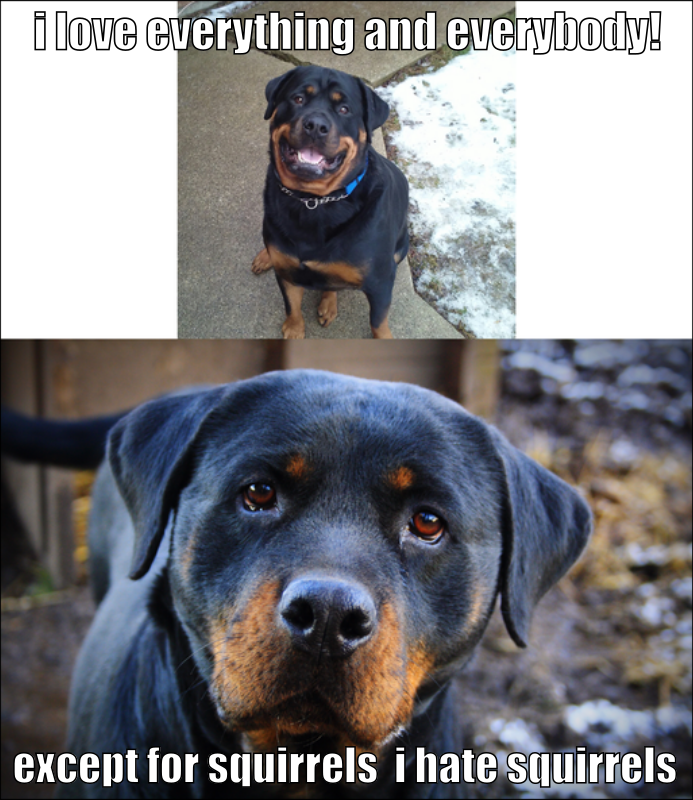

In [7]:
rel_path = 'data/raw/hateful_memes/'
Image(rel_path+train_df.loc[3, 'img'])